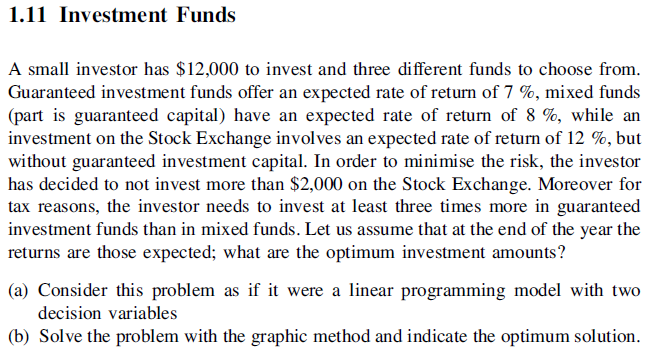

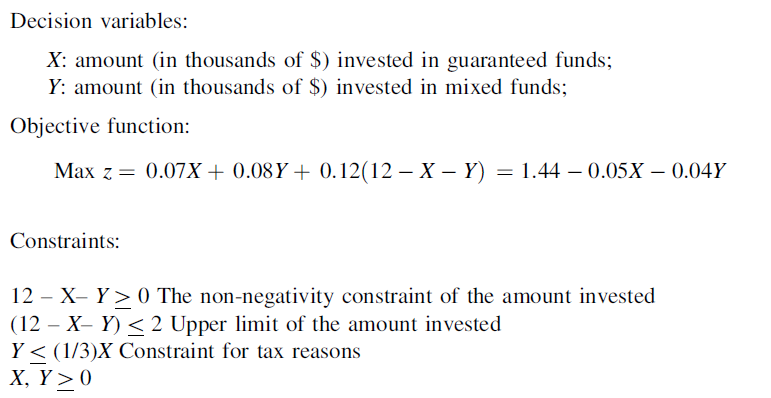

Comments:
- This one is not really worth to put in sets, as it is so easy and straightforward. It is more interesting to check the solution in Excel: Solver, by Simplex algorithm and by graphical method.
- We can delete the non-negativity contraint of amount invested, as we add the stock amount invested as non-negative variable. We will need to include this constraint in the Excel in order to convert the 3 variable problem to a 2 variable one.
- We need to add an additional constraint: sum of all amounts total 12000.  

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [3]:
#Defining the model

model = pyo.ConcreteModel()

In [4]:
#Decision variables

model.guaranteed=pyo.Var(within=pyo.NonNegativeReals)
guaranteed=model.guaranteed

model.mixed=pyo.Var(within=pyo.NonNegativeReals)
mixed=model.mixed

model.stock=pyo.Var(within=pyo.NonNegativeReals)
stock=model.stock

In [8]:
#Objective rule and constraints

model.Obj = pyo.Objective(expr=guaranteed*0.07+mixed*0.08+stock*0.12, sense = pyo.maximize)

model.Const1 = pyo.Constraint(expr=stock<=2000)
model.Const2 = pyo.Constraint(expr=3*mixed-guaranteed<=0)
model.Const3 = pyo.Constraint(expr=guaranteed+mixed+stock<=12000)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [9]:
optm = SolverFactory('glpk')
results=optm.solve(model)

In [10]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 965.0
  Upper bound: 965.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Number of nonzeros: 6
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.005655050277709961
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [13]:
print("objective function: ", model.Obj())
print("Amount invested in guaranteed: ",guaranteed()," €")
print("Amount invested in mixed: ",mixed()," €")
print("Amount invested in stock: ",stock()," €")

objective function:  965.0
Amount invested in guaranteed:  7500.0  €
Amount invested in mixed:  2500.0  €
Amount invested in stock:  2000.0  €
